## À propos de ce tutoriel 

Ce tuto est une introduction pratique au machine learning, accessible à tous, ou presque. 

Se mettre au machine learning peut être compliqué lorsque l'on cherche les infos un peu au hasard sur le web... 

Ici, mon but est de vous aider à démarrer avec un exemple concret de reconnaissance d'image, avec juste un petit peu de code, et pas de maths.  

Après une courte introduction au machine learning, vous apprendrez: 

* les principes de l'apprentissage supervisé pour la classification,
* comment installer la suite scientifique de python rapidement et sans effort,
* comment accéder à vos données d'entraînement et les valider,
* comment créer et entraîner votre premier réseau de neurones sur ces données,
* comment utiliser le réseau entraîné et tester ses performances.

#### Prérequis 

Nous allons travailler en python, un excellent choix pour l'analyse de données. Si vous ne connaissez pas python mais que avez fait un peu de C, de C++, ou de java par exemple, tout ira bien! C'est l'occasion idéale de découvrir python et, pourquoi pas, de tomber vous aussi amoureux de ce langage! 

## Qu'est-ce que le machine learning? 

Le machine learning (apprentissage machine) est un domaine de l'intelligence artificielle dans lequel on crée un système capable d'apprendre de manière autonome à partir d'un échantillon de données d'entraînement. Une fois l'entraînement réalisé, le système est utilisé pour effectuer des prédictions concernant de nouvelles données, jamais observées auparavant. 

Cette approche permet de résoudre des problèmes complexes, difficiles voire impossibles à traiter par une approche traditionnelle de la programmation. 

Il existe de nombreuses applications du machine learning, comme par exemple:

* les véhicules autonomes: [Celle de google doit encore apprendre à rouler à droite sur l'autoroute](https://www.youtube.com/watch?v=TsaES--OTzM) ;-) 
* le pilotage de drones: le pilote donne seulement des instructions simples (haut, bas, gauche, droit, ou juste des coordonnées 3D), et le drone réalise automatiquement les ajustements complexes nécessaires à sa stabilité, ou pour [voler en formation](https://www.youtube.com/watch?v=VnTQTm7vNbY)
* les [robots](https://www.youtube.com/watch?v=LikxFZZO2sk) 
* la prédiction du prix d'un bien immobilier en fonction de variables comme la localisation du bien, le nombre de pièces, et même le texte de l'annonce immobilière.
* les publicités google qui prédisent vos chances de cliquer sur une publicité, afin de vous envoyer les plus pertinentes. 
* les systèmes de recommandation collaboratifs: vidéos youtube ou produits amazon que vous êtes susceptible d'aimer
* l'identification des pièces présentant un défaut sur la chaîne de production
* l'identification de groupes de personnes de même opinion sur les réseaux sociaux, et des influenceurs les plus importants au sein de ces groupes.
* la catégorisation des photos (vous pouvez essayer de taper chat ou nourriture dans la boîte de recherche de votre bibliothèque google photos si vous en avez une)
* la traduction automatique ([google translate](https://translate.google.fr/?hl=en) )
* le filtrage des pourriels
* la création automatique d'images: [deep dream](https://deepdreamgenerator.com/#gallery), [neural doodle](https://github.com/alexjc/neural-doodle)
* ...  


## Machine learning pour la classification

Le but de ce tuto est de mettre directement et facilement la main à la pâte. Je ne vais donc pas vous ennuyer avec des concepts mathématiques compliqués, et me contenter de vous donner une explication simple des grands principes de l'apprentissage supervisé pour la classification. 

Il y aura un post plus détaillé par la suite au sujet du processus d'apprentissage.

![Supervised learning](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/supervised_learning.png)

On donne au réseau une succession d'exemples d'entraînement. Chaque exemple comprend: 

* l'image d'un chiffre
* une étiquette, qui nous dit quel est le chiffre réellement représenté par l'image. L'étiquette pourrait avoir été renseignée par la personne qui a écrit ce chiffre. 

Dans le schéma ci-dessus, la première image est traitée par le réseau de neurone, qui nous dit que l'image est un 9. 

Au début du processus d'apprentissage, les connexions entre les neurones dans le réseau sont aléatoires, et le réseau n'est pas encore capable de se rendre utile en quoi que ce soit; il se contente de nous donner une réponse aléatoire. 

La réponse est comparée à l'étiquette. Dans ce cas, la réponse (9) est différente de l'étiquette (en fait, ce chiffre est un 3), et un retour est donné au réseau de neurones pour qu'il puisse s'améliorer. Les connexions entre les neurones sont modifiées, en favorisant celles qui tendent à donner une réponse correcte. 

Après la modification, les exemples suivants sont considérés, et le réseau apprend selon un processus itératif. 

Le nombre d'exemples nécessaires pour entraîner le réseau correctement peut être de l'ordre de quelques centaines pour des réseaux avec une architecture simple, ou de millions pour les réseaux complexes. 


## Installation de python et de sa librairie scientifique

**Si vous êtes déjà en train de faire tourner ce tuto dans un notebook jupyter, vous pouvez passer directement à la section suivante.**

Nous allons utiliser un ensemble d'outils venant de [scipy](https://www.scipy.org/), la librairie scientifique de python:

* [scikit-learn](https://scikit-learn.org/): l'une des boîtes à outils les plus utilisées pour le machine learning en python. Il nous donnera un accès facile à l'échantillon de chiffres manuscrits, et nous permettra de définir et d'entraîner notre réseau en quelques lignes de code
* [numpy](http://www.numpy.org/): module central pour la manipulation de tableaux de données, tels que nos images de chiffres
* [matplotlib](https://matplotlib.org/): outils de visualisation, indispensables pour vérifier que tout va bien à toutes les étapes
* [jupyter](https://jupyter.org/): serveur web qui vous permettra de suivre ce tuto et de faire tourner le code directement dans votre navigateur. 

Scipy est en fait plus qu'une simple librairie, mais un écosystème de modules python interdépendants. 

Il y a six ans, quand je démarrais avec scipy, j'ai essayé d'installer manuellement tous les modules dont j'avais besoin, pour la version de python qui était déjà en place sur mon système. 

Je passai presque une journée à me battre avec les dépendances entre les différents modules. Par exemple, scikit-learn avait besoin de numpy version A, mais pandas, lui, de la version B. Ou alors, l'un de ces modules ne pouvait fonctionner qu'avec une version de python plus récente que celle dont je disposais, ce qui voulait dire que j'allais devoir installer une nouvelle version de python sur mon système, puis gérer par la suite les deux version de python en parallèle. 

C'est là que j'ai découvert [Anaconda](https://anaconda.org/).

Comme le dit le site web d'Anaconda: 

*Avec plus de 6 millions d'utilisateurs, la distribution open source Anaconda est le moyen le plus rapide et le plus facile de faire de la data science et du machine learning sous Linux, Windows, et Mac OS X. C'est le standard industriel pour le développement, le test, et l'entraînement sur une seule machine.*

En résumé, l'équipe d'Anaconda maintient un dépôt contenant plus de 1400 modules de data science, tous compatibles, et fournit des outils permettant d'installer une version de python ainsi que ces modules simplement, et en moins de cinq minutes. 

Et c'est ce que nous allons faire maintenant!  

Tout d'abord, [téléchargez Anaconda](https://www.anaconda.com/download/) pour votre système: 

* Choisissez la version python 2.X, pas 3.X.
* Si vous utilisez Windows ou Linux, prenez garde à choisir l'outil d'installation 64 bits si vous avez un système 64 bits. 

Lancez l'outil d'installation et installez Anaconda. 

Finalement, lancez l'application Anaconda Navigator. Sous Windows, vous pouvez la trouver en cliquant sur le menu démarrer, et en tapant anaconda. 

Dans la fenêtre de l'Anaconda Navigator, cliquez sur l'onglet Home, et démarrez le jupyter notebook. 

Vous devriez être redirigé vers une page du jupyter notebook dans votre navigateur. Nous allons maintenant tester cet outil. 

Créez un nouveau notebook. Dans le notebook, vous devriez voir une cellule vide, dans laquelle vous pouvez écrire du code python. Copiez-collez le code suivant dans cette cellule, et exécutez-la en pressant MAJ+entrée.

```python
print 'hello world!'
for i in range(10):
    print i
```

Une nouvelle cellule apparaît. Importez numpy et matplotlib (pensez bien à exécuter la cellule après avoir écrit le code):

```python
import matplotlib.pyplot as plt 
import numpy as np 
```

Ceci est la méthode standard pour importer ces modules:

* le module pyplot de matplotlib est maintenant appelé plt
* le module numpy est appelé np.

Vous auriez très bien pu choisir d'autres noms, mais comme ceux-là sont utilisés par quasiment tout le monde, il sera plus simple de les utiliser aussi.

Maintenant, essayons de faire notre premier graphique, histoire de vérifier que numpy et matplotlib fonctionnent:

```python
# création d'un tableau numpy à 1 dimension avec 16 valeurs entre 0 et 3
x = np.linspace(0, 3, 16)
print x 
# création d'un nouveau tableau à partir de x.
# x**2 retourne un tableau dans lequel chacun des éléments de x
# a été mis au carré.
y = x**2
print y
# tracé de y en fonction de x. 
# vous devriez obtenir une parabole. 
# vérifiez que pour x=1, on a bien y=1, et que pour x = 2, y = 4 
plt.plot(x, y)
```

--- 

💡 **Petit avertissement:**

C'est assez facile de ce perdre dans la documentation de tous ces outils, et d'y perdre beaucoup de temps. 

Par exemple, si vous lisez la documentation de la méthode plt.plot (je ne vous donnerai pas le lien, mais vous pourriez le retrouver sur google ;-) ), vous verrez qu'il y a de nombreuses façons de l'appeler, avec de nombreux paramètres optionnels. Mais après tout, nous avons seulement besoin de savoir que `plt.plot(x,y)` trace y en fonction de x.  

Pour ne pas trop galérer, je vous conseille de suivre ce tutorial jusqu'au bout sans creuser plus loin. 

Ainsi, vous parviendrez à entraîner votre premier réseau de neurones facilement et ce faisant, vous vous familiariserez avec les outils les plus importants de scikit-learn, numpy, et matplotlib. Ce sera bien suffisant pour bon nombre de projets de machine learning, et vous pourrez toujours en apprendre plus par la suite quand cela deviendra nécessaire (vous le saurez!)

Pour aller plus loin, un excellent [cours sur scipy](https://www.scipy-lectures.org/) en anglais. 

---

Maintenant que vous avez accès au notebook jupyter, j'ai une bonne nouvelle pour vous. Vous n'aurez pas à continuer à copier-coller le code de cette page dans votre notebook. 

Faîtes plutôt la chose suivante:

* [téléchargez le dépôt contenant ce notebook](https://github.com/cbernet/maldives/archive/master.zip)
* décompressez-le, par exemple vers `Downloads/maldives-master`.
* lancez un jupyter notebook depuis l'Anaconda Navigator
* dans le notebook, naviguez vers `Downloads/maldives-master/handwritten_digits_sklearn`
* et ouvrez `handwritten_digits_sklean_fr.ipynb`

Vous devriez voir cette page apparaître dans le notebook. À partir de maintenant, continuez le tutoriel dans le notebook. Vous devrez exécuter les cellules dans l'ordre. Vous pourrez même ajouter des cellules et modifier les cellules existantes pour expérimenter. 

## L'échantillon de chiffres

scikit-learn fournit plusieurs échantillons test. Chargeons l'échantillon de chiffres manuscrits: 

In [3]:
from sklearn import datasets
digits = datasets.load_digits()

En python, la fonction `dir` retourne les noms des attributs d'un objet. En d'autres termes, cette fonction nous dit quelle information est stockée dans l'objet sous forme d'autres objets. Utilisons cette fonction pour regarder ce que contient notre échantillon `digits`: 

In [4]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

Voyons quel est le type des objets `digits.images` et `digits.target` :

In [5]:
print type(digits.images)
print type(digits.target)

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


`images` et `target` sont tous deux des `ndarrays` (tableaux à N dimensions), un type défini dans le module `numpy`.
L'attribut `shape` d'un `ndarray` donne le nombre de dimensions et la taille du tableau suivant chacune des dimensions. Par exemple:  

In [6]:
digits.images.shape

(1797, 8, 8)

`digits.image` est un tableau à 3 dimensions. La première indexe les images, et il y en a 1797. Les deux dimensions suivantes correspondent aux coordonnées x et y des pixels de chaque image. Chaque image a donc 8x8 = 64 pixels. On peut visualiser `digits.images` en 3D comme une pile d'images de 8x8 pixels chacune. 

Imprimons les données de la première image 8x8. Chaque case dans le tableau correspond à un pixel, et la valeur dans cette case est la quantité de noir dans le pixel.

In [7]:
print digits.images[0]

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Affichons l'image graphiquement (parfois, l'image n'apparaît pas. Si c'est le cas, il suffit de ré-exécuter la cellule ci-dessous avec MAJ+entrée): 

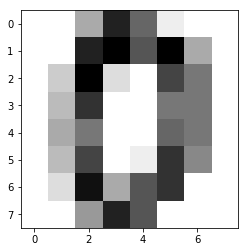

In [9]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')

La résolution de l'image est mauvaise. Originellement, l'échantillon de chiffres manuscrits contient des images de bien meilleure résolution. Mais la résolution a été réduite pour créer les échantillons test de scikit-learn pour accélérer et simplifier l'entraînement d'algorithmes de machine learning pour classifier ces chiffres. 

Maintenant, regardons l'attribut `digits.target` : 

In [10]:
print digits.target.shape
print digits.target

(1797,)
[0 1 2 ... 8 9 8]


C'est un tableau à une dimension, avec 1797 cases. Il contient les étiquettes, c'est à dire les chiffres auxquels correspondent chaque image. Par exemple, la première étiquette est 0, et correspond à l'image ci-dessus. 

Nous allons maintenant créer une petite fonction qui nous permettra d'afficher plusieurs images d'un coup, ainsi que les étiquettes correspondantes: 

In [11]:
def plot_multi(i):
    '''Plots 16 digits, starting with digit i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

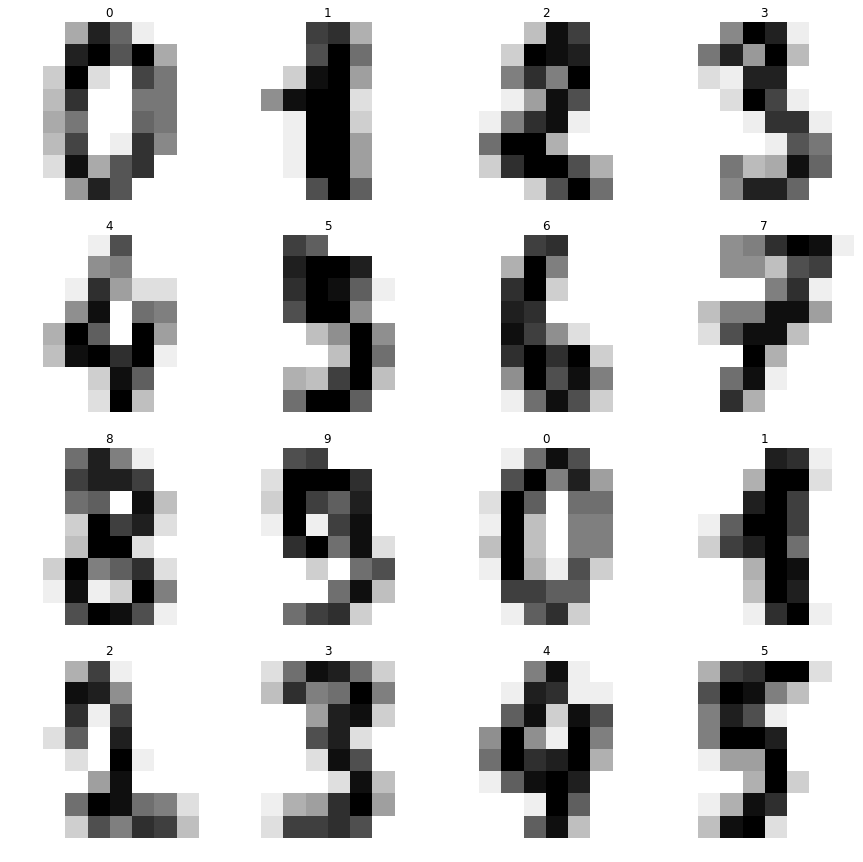

In [12]:
plot_multi(0)

Vous pouvez afficher les images suivantes en appelant `plot_multi(16)`, `plot_multi(32)`, etc. 

Vous verrez probablement qu'avec une si mauvaise résolution, ce n'est pas si facile de reconnaître certains de ces chiffres, même pour notre cerveau humain hautement performant. Dans ces conditions, le réseau de neurones sera lui aussi limité par la faible qualité des images. Pouvons-nous créer un réseau de neurones au moins aussi performant qu'un humain? Ce serait déjà bien!


## Création du réseau et préparation de l'échantillon d'entraînement

[scikit-learn](https://scikit-learn.org) permet de créer, d'entraîner, et d'évaluer un réseau de neurones en quelques lignes de code.  

Nous allons créer un réseau extrêmement simple, avec seulement trois couches: 

* une couche d'entrée (*input layer*), avec un noeud par pixel dans les images (64 noeuds, donc). Un noeud est un neurone qui ne fait rien. Il se content de prendre la valeur en entrée et de la transmettre aux neurones de la couche suivante.
* une couche cachée (*hidden layer*) avec 15 neurones. Nous aurions pu choisir un autre nombre de neurones, et ajouter des couches avec différents nombres de neurones
* une couche de sortie (*output layer*) avec 10 neurones, correspondant à nos 10 classes de chiffres, de 0 à 9

On dit que ce type de réseau est *dense*, ce qui veut dire que dans chaque couche, chaque neurone est connecté avec tous les neurones des couches précédantes et suivantes.


![Simple dense network](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/simple_dense.png)

La couche d'entrée nécessite un tableau unidimensionnel en entrée, mais nos images ont deux dimensions. Il nous faut donc les "aplatir", c'est à dire les sérialiser:

In [13]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

Maintenant, nous avons 1797 images aplaties. Les deux dimensions de nos images 8x8 ont été forcées vers une seule dimension en écrivant les lignes de 8 pixels les unes après les autres. La première image que nous avons affichée tout à l'heure est maintenant représentée par un tableau 1D avec 8x8 = 64 cases. Vous pouvez vérifier que les valeurs ci-dessous sont les mêmes que dans l'image 2D originale. 

In [14]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Séparons maintenant notre échantillon entre deux sous-échantillons indépendants:

In [16]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

Les 1000 premières images seront utilisées pour l'entraînement. Le reste de l'échantillon sera utilisé ensuite pour évaluer les performances du réseau. 

Nous pouvons maintenant créer le réseau de neurones. Nous utilisons une couche cachée avec 15 neurones, et scikit-learn trouve automatiquement le nombre de neurones à utiliser dans les couches d'entrée et de sortie. Ne prêtez pas attention aux autres paramètres, nous couvrirons cela dans de futurs tutos. 

In [17]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)


Enfin, entraînons le réseau: 

In [18]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

L'entraînement était très rapide car le réseau de neurones est simple et car l'échantillon d'entraînement est petit. Maintenant que le réseau de neurones est prêt, voyons ce qu'il prédit pour les images de test.

In [20]:
predictions = mlp.predict(x_test)
predictions[:50] 
# on regarde juste la prédiction pour 
# les 50 premières images dans l'échantillon de test

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

Ces prédictions devraient être assez proches des étiquettes de l'échantillon de test, vérifions cela (merci de bien vouloir comparer les valeurs de ces deux tableaux)

In [21]:
y_test[:50] 
# étiquettes pour les 50 premiers examples de l'échantillon de test

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

Pas mal! On voit que la totalité ou presque des prédictions correspondent à la vérité. 

Mais peut-on être un peu plus quantitatif? Nous pouvons calculer la *précision* du classement, qui est la probabilité de classer un chiffre dans la bonne catégorie. Là encore, scikit-learn nous fournit un outil tout prêt pour cela: 

In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9159347553324969

Cette valeur est la probabilité que les chiffres de l'échantillon de test sont classés dans la bonne catégorie. 
Ainsi, dans 91.6% des cas, le classement est correct. 

**Nous avons donc obtenu une précision de 91.6% avec ce réseau de neurones très simple. Pas mal!**

Mais ce n'est qu'un premier essai. 

Et je dois d'ailleurs vous avouer que j'ai volontairement choisi une architecture ultra-simpliste pour ce réseau afin d'éviter d'obtenir une trop bonne performance. Nous verrons plus tard comment optimiser le réseau pour maximiser la précision. 

## Et ensuite? 

Dans ce tuto, vous avez appris

* Les grands principes de l'apprentissage machine supervisé pour le classement 
* Comment installer et utiliser la suite scientifique de python pour le machine learning
* Comment comprendre et valider l'échantillon de données d'entrée
* Comment entraîner un réseau de neurones à la reconnaissance d'images, permettant d'obtenir une précision de plus de 90% pour le classement de chiffres manuscrits. 

Ce n'est que le début! Dans les prochains posts, nous allons

* tenter d'optimiser notre réseau pour une meilleure précision
* utiliser le deep learning (des réseaux bien plus complexes) pour atteindre une précision supérieure à 99%. 
* plonger un peu plus dans les méchanismes de l'entraînement pour comprendre pourquoi nous avons créé notre réseau de cette manière-là. 
